# Py-sfc_models  
https://github.com/brianr747/SFC_models   
https://pypi.python.org/pypi/sfc_models/   
http://www.bondeconomics.com/search?q=sfc_models   
https://github.com/brianr747/SFC_models/tree/master/sfc_models/examples/scripts  
sfc_models is a Python package for building stock-flow consistent (SFC) models.  
Author: Brian Romanchuk

In [1]:
!pip install sfc_models

## `intro_5_04_SIMEX1.py` 
https://github.com/brianr747/SFC_models/blob/master/sfc_models/examples/scripts/intro_5_04_SIMEX1.py  
Build Model SIMEX from Godley & Lavoie (Chapter 3, section 3.7.1.)    
Copyright 2017 Brian Romanchuk
See also:  
http://www.stephenkinsella.net/2008/01/21/ec6012-lecture-5-sim-and-simex/  

In [17]:
import os, sfc_models
from sfc_models.gl_book.chapter3 import SIMEX1, SIM
from sfc_models.examples.Quick2DPlot import Quick2DPlot

In [2]:
logfile = "sfc_models"
sfc_models.register_standard_logs('output', logfile)

### Model SIMEX

In [18]:
builder_SIMEX = SIMEX1(country_code='C1', use_book_exogenous=True)
model_SIMEX = builder_SIMEX.build_model()
print(model_SIMEX.main())

          GOV__F = GOV__LAG_F +GOV__T -GOV__DEM_GOOD                            # [F] Financial assets
   GOV__FISC_BAL = GOV__INC                                                     # [FISC_BAL] Government Fiscal Balance
        GOV__INC = GOV__T -GOV__DEM_GOOD                                        # [INC] Income (PreTax)
      GOV__LAG_F = GOV__F (k -1 )                                               # [LAG_F] Previous periods financial assets.
   GOV__PRIM_BAL = GOV__T -GOV__DEM_GOOD                                        # [PRIM_BAL] Government Primary Fiscal Balance
          GOV__T = TF__T                                                        # [T] Government Taxes
    HH__AfterTax = HH__INC -HH__T                                               # [AfterTax] Aftertax income
    HH__AlphaFin = 0.4000                                                       # [AlphaFin] Parameter for consumption out of financial assets
 HH__AlphaIncome = 0.6000                                          

In [19]:
model_SIMEX.TimeSeriesCutoff = 20

In [20]:
Y_SIMEX = model_SIMEX.GetTimeSeries('GOOD__SUP_GOOD')
time = model_SIMEX.GetTimeSeries('k')
income = model_SIMEX.GetTimeSeries('HH__AfterTax')
expected_income = model_SIMEX.GetTimeSeries('HH__EXP_AfterTax')
F_SIMEX = model_SIMEX.GetTimeSeries('HH__F')

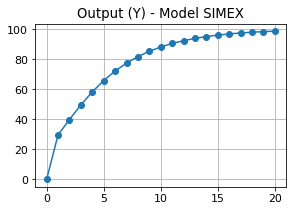

In [21]:
Quick2DPlot(time, Y_SIMEX, 'Output (Y) - Model SIMEX')

###  Model SIM

In [16]:
builder_SIM = SIM(country_code='C1', use_book_exogenous=True)
model_SIM = builder_SIM.build_model()
print(model_SIM.main())

         GOV__F = GOV__LAG_F +GOV__T -GOV__DEM_GOOD                        # [F] Financial assets
  GOV__FISC_BAL = GOV__INC                                                 # [FISC_BAL] Government Fiscal Balance
       GOV__INC = GOV__T -GOV__DEM_GOOD                                    # [INC] Income (PreTax)
     GOV__LAG_F = GOV__F (k -1 )                                           # [LAG_F] Previous periods financial assets.
  GOV__PRIM_BAL = GOV__T -GOV__DEM_GOOD                                    # [PRIM_BAL] Government Primary Fiscal Balance
         GOV__T = TF__T                                                    # [T] Government Taxes
   HH__AfterTax = HH__INC -HH__T                                           # [AfterTax] Aftertax income
   HH__AlphaFin = 0.4000                                                   # [AlphaFin] Parameter for consumption out of financial assets
HH__AlphaIncome = 0.6000                                                   # [AlphaIncome] Parameter for co

In [ ]:
model_SIM.TimeSeriesCutoff = 20

In [ ]:
Y_SIM = model_SIM.GetTimeSeries('GOOD__SUP_GOOD')
F_SIM = model_SIM.GetTimeSeries('HH__F')

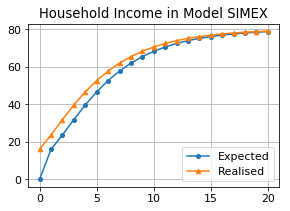

In [7]:
q = Quick2DPlot([time, time], [expected_income, income], 'Household Income in Model SIMEX', run_now=False,
                filename='SIMEX1_output.png')
q.Legend = ['Expected', 'Realised']
q.DoPlot()

### Comparison SIMEX vs SIM
#### Output

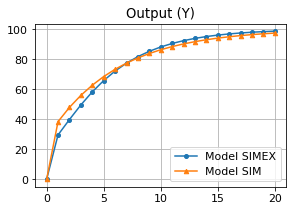

In [8]:
q = Quick2DPlot([time, time], [Y_SIMEX, Y_SIM], 'Output (Y)', run_now=False)
q.Legend = ['Model SIMEX', 'Model SIM']
q.DoPlot()

#### Household Financial Assets

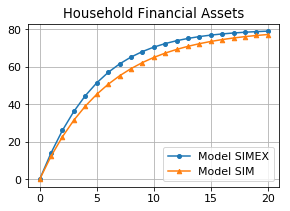

In [9]:
q = Quick2DPlot([time, time], [F_SIMEX, F_SIM], 'Household Financial Assets', run_now=False)
q.Legend = ['Model SIMEX', 'Model SIM']
q.DoPlot()